# Project Name - Credit Card Default Prediction

# Project Summary -





This project is aimed at predicting the case of customers' default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification credible or not credible clients.

Our approach is to fit a machine learning model on this past data and try to predict the closing price for new unseen data using the parameters learned during training.

This way, we can get our model to learn the trends present in the data during training and use that information during prediction.

We will apply various Classification Models for this task such as : Logistic Regression, Decision Tree, Random Forest and K Nearest Neighbor



• Most of the credit card users are Female and have higher number of defaults.

• Most of the credit card users are highly educated.

• Single users have more no. of credit cards.

• The number of credit card users goes down with increase in age as old people have less consumption and may not be able to use credit cards and their purchases are usually made by younger family members.

• Using a Logistic Regression classifier, we can predict an accuracy of 68% and ROC_AUC score of 0.72

• Using Random Forest Classifier, we can predict an accuracy of around 87% and ROC_AUC score of 0.94

• Using K-Neighbor Classifier, we can predict an accuracy of 86% and ROC_AUC score of 0.93

• Using Decision Tree Classifier, we can predict an accuracy of 78% and ROC_AUC score of 0.80

• Random Forest Classifier performs best among all models.

• Logistic Regression is not giving best results

• **Our best models are Random Forest, K-Neighbor Classifier that score really well on Precision, Recall, ROC_AUC and F1 score.This being an imbalanced dataset, Recall will be most important metric as we don't want to classify a defaulter as a non defaulter so that makes K Neighbor Classifier model more suitable for the task**

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

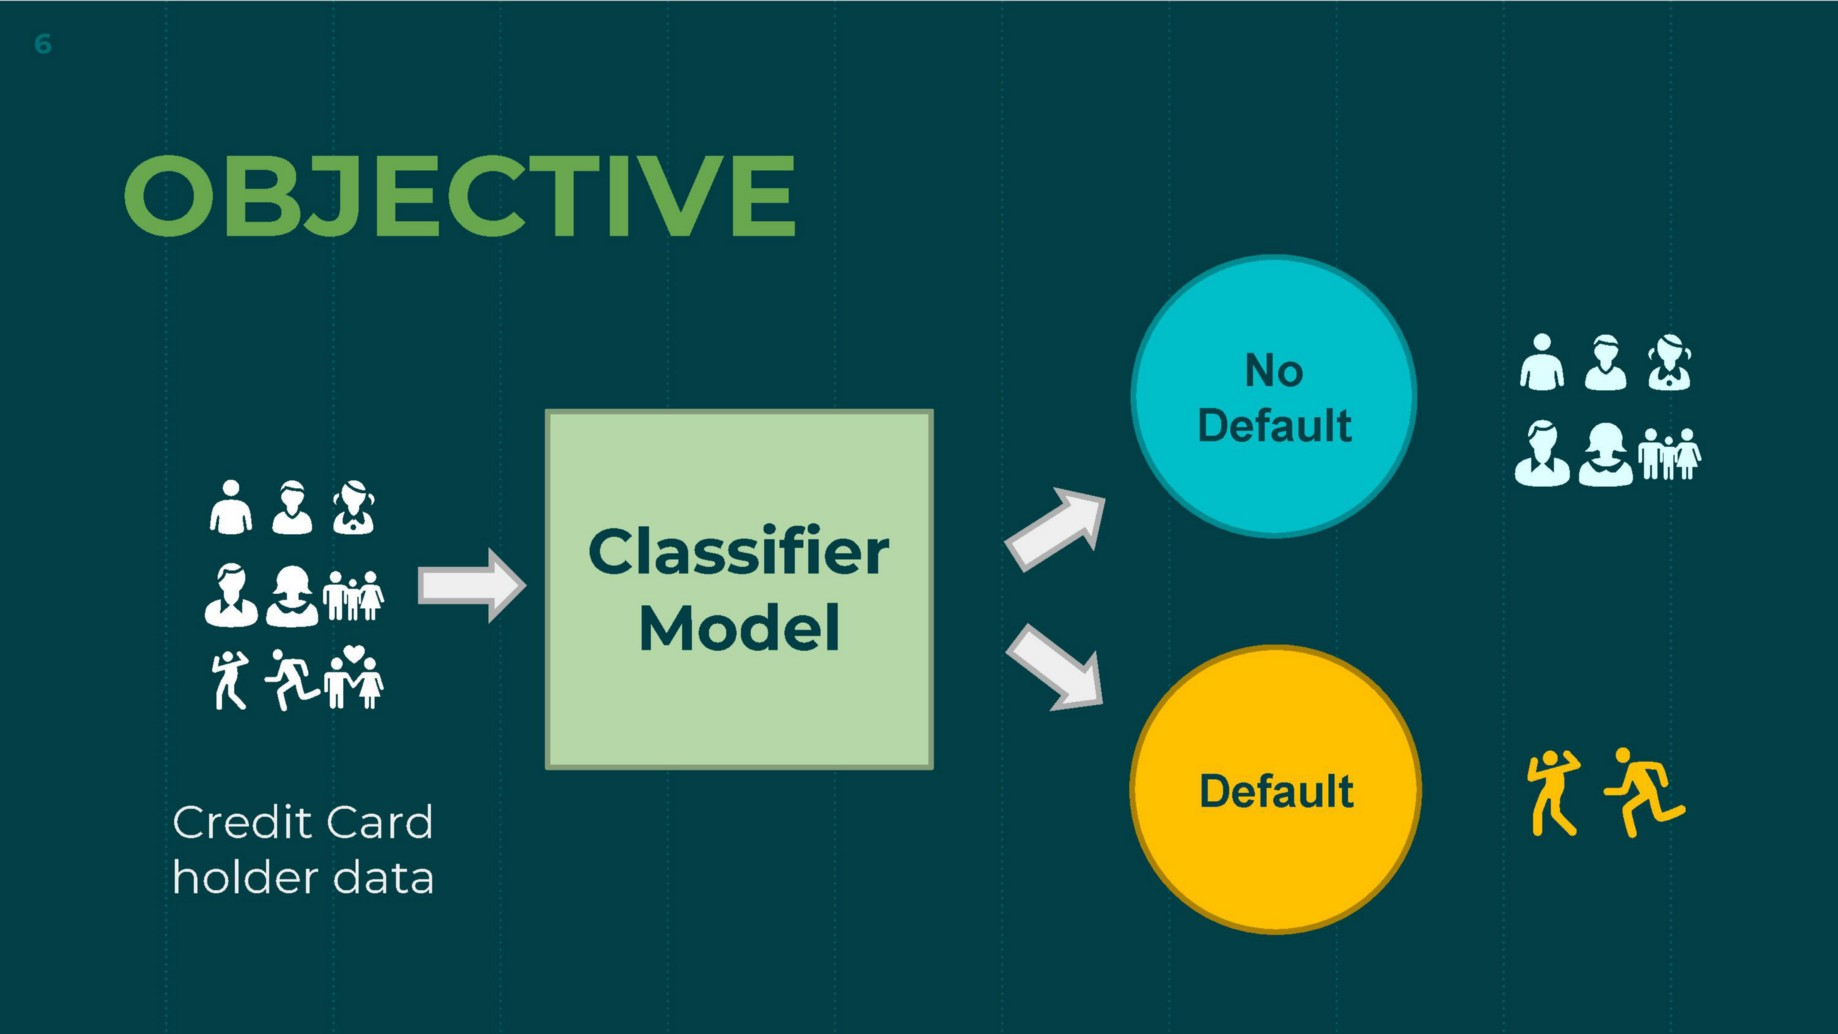

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments . From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

<b>Source of Data</b>

The default credit card data set was originated from UCI Machine Learning Repository
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 25 variables as explanatory variables:
*#Understanding our features and the data it contains in detail.

1.ID: ID of each client (unique identifier)

2.LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

3.SEX: Gender (1=male, 2=female)

4.EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

5.MARRIAGE: Marital status (1=married, 2=single, 3=others)

6.AGE: Age in years

7.PAY_0: Repayment status in September, 2005 (-2 = Unused,-1=pay duly,0=Revolving Credit, 1=payment delay for one month,     2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)

8.PAY_2: Repayment status in August, 2005 (scale same as above)

9.PAY_3: Repayment status in July, 2005 (scale same as above)

10.PAY_4: Repayment status in June, 2005 (scale same as above)

11.PAY_5: Repayment status in May, 2005 (scale same as above)

12.PAY_6: Repayment status in April, 2005 (scale same as above)

13.BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

14.BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

15.BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

16.BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

17.BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

18.BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

19.PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

20.PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

21.PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

22.PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

23.PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

24.PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

25.default.payment.next.month: Default payment (1=yes, 0=no)

# Loading the Data and libraries.

In [132]:
# Importing the libraries we'll need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc, classification_report

from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings('ignore')

## Dataset Loading

In [133]:
# Loading the data
df = pd.read_excel('C:/Users/HP\Downloads/ccdd.xlsx',  header=0)

# Exploring The Dataset

In [134]:
# reading the data set
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          1         2   37      0      0      0      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0      64400      57069      57608      19394      19619   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      20024      2500      1815       657      1000      1000       800   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [135]:
# checking the shape of the dataframe
df.shape

(19731, 25)

As we can see that we have around 30000 rows and 25 columns in our dataset.

In [136]:
# since there are too many columns in the dataframe, we are not able to see all of them.
pd.set_option('display.max_columns', None)

In [137]:
# Now, we should be able to see all columns. Checking the last few instances.
df.tail()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
19726  19727     210000    1          2         1   34      3      2      2   
19727  19728      10000    1          3         1   43      0      0      0   
19728  19729      80000    1          2         2   34      2      2      2   
19729  19730     150000    1          3         2   43     -1     -1     -1   
19730  19731      50000    1          2         1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
19726      2      2      2       2500       2500       2500       2500   
19727     -2     -2     -2       8802      10400          0          0   
19728      2      2      2      72557      77708      79384      77519   
19729     -1      0      0       1683       1828       3502       8979   
19730      0      0      0      47929      48905      49764      36535   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
19726       2500       2500         0         0         0         0         0   
19727          0          0      2000         0         0         0         0   
19728      82607      81158      7000      3500         0      7000         0   
19729       5190          0      1837      3526      8998       129         0   
19730      32428      15313      2078      1800      1430      1000      1000   

       PAY_AMT6  default payment next month  
19726         0                           1  
19727         0                           0  
19728      4000                           1  
19729         0                           0  
19730      1000                           1

In [138]:
# checking for null values in our dataframe.
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

We can clearly see from above that there are no null values in our dataset.

In [139]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19731 entries, 0 to 19730
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          19731 non-null  int64
 1   LIMIT_BAL                   19731 non-null  int64
 2   SEX                         19731 non-null  int64
 3   EDUCATION                   19731 non-null  int64
 4   MARRIAGE                    19731 non-null  int64
 5   AGE                         19731 non-null  int64
 6   PAY_0                       19731 non-null  int64
 7   PAY_2                       19731 non-null  int64
 8   PAY_3                       19731 non-null  int64
 9   PAY_4                       19731 non-null  int64
 10  PAY_5                       19731 non-null  int64
 11  PAY_6                       19731 non-null  int64
 12  BILL_AMT1                   19731 non-null  int64
 13  BILL_AMT2                   19731 non-null  int64
 14  BILL_A

### No null values and No categorical variable

In [140]:
# Checking some desriptive statistics.
df.describe(include='all')

ID      LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  19731.000000   19731.000000  19731.000000  19731.000000  19731.000000   
mean    9866.000000  130708.124271      1.603264      1.898434      1.555167   
std     5695.993416  108675.455797      0.489233      0.771727      0.524354   
min        1.000000   10000.000000      1.000000      0.000000      0.000000   
25%     4933.500000   50000.000000      1.000000      1.000000      1.000000   
50%     9866.000000  100000.000000      2.000000      2.000000      2.000000   
75%    14798.500000  200000.000000      2.000000      2.000000      2.000000   
max    19731.000000  520000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  19731.000000  19731.000000  19731.000000  19731.000000  19731.000000   
mean      35.278293      0.085804     -0.050327     -0.092747     -0.169429   
std        9.517628      1.158930      1.268653      1.281991      1.271278   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       42.000000      1.000000      0.000000      0.000000      0.000000   
max       75.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2  \
count  19731.000000  19731.000000   19731.000000   19731.000000   
mean      -0.231666     -0.272059   30714.437788   28982.726218   
std        1.238757      1.252420   34312.730271   32967.314495   
min       -2.000000     -2.000000  -11545.000000  -18618.000000   
25%       -1.000000     -1.000000    2374.000000    1672.000000   
50%        0.000000      0.000000   18199.000000   17328.000000   
75%        0.000000      0.000000   48684.000000   47583.500000   
max        8.000000      8.000000  162241.000000  155282.000000   

           BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count   19731.000000   19731.000000   19731.000000   19731.000000   
mean    27064.295880   24527.655567   22525.644215   21557.545639   
std     31211.801299   28926.912830   27442.947747   27142.038852   
min    -15000.000000  -15588.000000  -20254.000000  -24920.000000   
25%      1230.000000     960.000000     700.000000     427.500000   
50%     16575.000000   14850.000000   12582.000000   10200.000000   
75%     44597.000000   38098.000000   32111.500000   30434.500000   
max    145978.000000  132677.000000  122830.000000  120940.000000   

           PAY_AMT1      PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5  \
count  19731.000000  19731.000000  19731.000000  19731.000000  19731.000000   
mean    2108.089555   1996.467589   1688.492575   1468.937864   1474.237140   
std     2036.999640   1996.755365   1849.881738   1674.806394   1694.670919   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      342.000000    291.000000      3.000000      0.000000      0.000000   
50%     1737.000000   1600.000000   1213.000000   1000.000000   1000.000000   
75%     3000.000000   3000.000000   2463.000000   2088.000000   2089.000000   
max    11009.000000  11242.000000  10661.000000   9567.000000   9700.000000   

           PAY_AMT6  default payment next month  
count  19731.000000                19731.000000  
mean    1438.737672                    0.258730  
std     1708.643115                    0.437948  
min        0.000000                    0.000000  
25%        0.000000                    0.000000  
50%     1000.000000                    0.000000  
75%     2012.500000                    1.000000  
max     9817.000000                    1.000000

###Checking for Duplicate values

In [141]:
# checking for duplicate data.
df.duplicated().sum()


0

So there is no duplicate data in our dataframe.

###Column Renaming


In [142]:
# Let's rename the columns for better understanding.
df.rename(columns={'PAY_0':'REPAY_STATUS_SEPT','PAY_2':'REPAY_STATUS_AUG','PAY_3':
                   'REPAY_STATUS_JUL','PAY_4':'REPAY_STATUS_JUN','PAY_5':'REPAY_STATUS_MAY','PAY_6':'REPAY_STATUS_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG',
                   'BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PRE_PAY_AMT_SEPT','PAY_AMT2':'PRE_PAY_AMT_AUG','PAY_AMT3':'PRE_PAY_AMT_JUL',
                   'PAY_AMT4':'PRE_PAY_AMT_JUN','PAY_AMT5':'PRE_PAY_AMT_MAY','PAY_AMT6':'PRE_PAY_AMT_APR'},inplace=True)

# EXPLORATORY DATA ANALYSIS

In [143]:
# Although the data in our df in all numerical, there are some categorical variables present in our dataset in encoded form.
# Exploring our dependent variable.
# first lets rename our dependent variable.
df.rename(columns={'default payment next month' : 'is_defaulter'}, inplace=True)

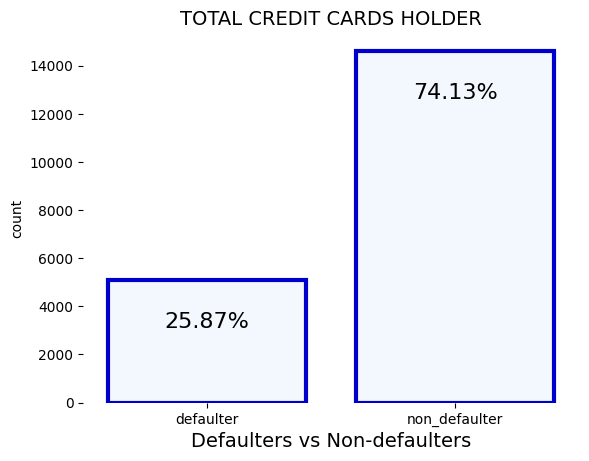

In [144]:
# plotting the value counts of our DV
ax = sns.countplot(data=df,x=df['is_defaulter'].replace({0:'non_defaulter',1:'defaulter'}), color = 'aliceblue', edgecolor='mediumblue', lw=3)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height-2000, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)
plt.xlabel('Defaulters vs Non-defaulters', fontsize=14)
plt.title('TOTAL CREDIT CARDS HOLDER', size=14)
#Removing the frame
plt.box(False);

We can see from the above graph and value counts, that we have a unbalanced dataset. The number of instances for non defaulters is significantly higher than defaulter

In [145]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'REPAY_STATUS_SEPT', 'REPAY_STATUS_AUG', 'REPAY_STATUS_JUL',
       'REPAY_STATUS_JUN', 'REPAY_STATUS_MAY', 'REPAY_STATUS_APR',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PRE_PAY_AMT_SEPT', 'PRE_PAY_AMT_AUG',
       'PRE_PAY_AMT_JUL', 'PRE_PAY_AMT_JUN', 'PRE_PAY_AMT_MAY',
       'PRE_PAY_AMT_APR', 'is_defaulter'],
      dtype='object')

In [146]:
# Now, we have several other categorical columns like marriage, education, sex.
df['MARRIAGE'].value_counts()

2    10528
1     8927
3      234
0       42
Name: MARRIAGE, dtype: int64

In [147]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0,3)

In [148]:
df['SEX'].value_counts()

2    11903
1     7828
Name: SEX, dtype: int64

In [149]:
df['EDUCATION'].value_counts()

2    9637
1    6264
3    3576
5     150
4      67
6      29
0       8
Name: EDUCATION, dtype: int64

In [150]:
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6],4)


In the education variable, as per our data description, 1 refers to graduate school, 2 refers to university etc. however we have no understanding of some numbers present. so we will replace these with others.


Similarly, in our marriage variable, there is a 0 value which has unknown meaning. so we will add that to others.

In [151]:
# As we can see that there are numerical values in these variables. so lets replace them with their original meanings for EDA .


cat_var_df = df[['SEX','EDUCATION','MARRIAGE','is_defaulter']].copy()

cat_var_df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                   'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5:'others',6:'others', 0:'others'},
                   'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others', 0 : 'others'}, 'is_defaulter' :{1:'defaulter',0:'non-defaulter'}},
                   inplace = True )

In [152]:
cat_var_df.head()

SEX        EDUCATION MARRIAGE   is_defaulter
0  FEMALE       university  married      defaulter
1  FEMALE       university   single      defaulter
2  FEMALE       university   single  non-defaulter
3  FEMALE       university  married  non-defaulter
4    MALE  graduate school   single  non-defaulter

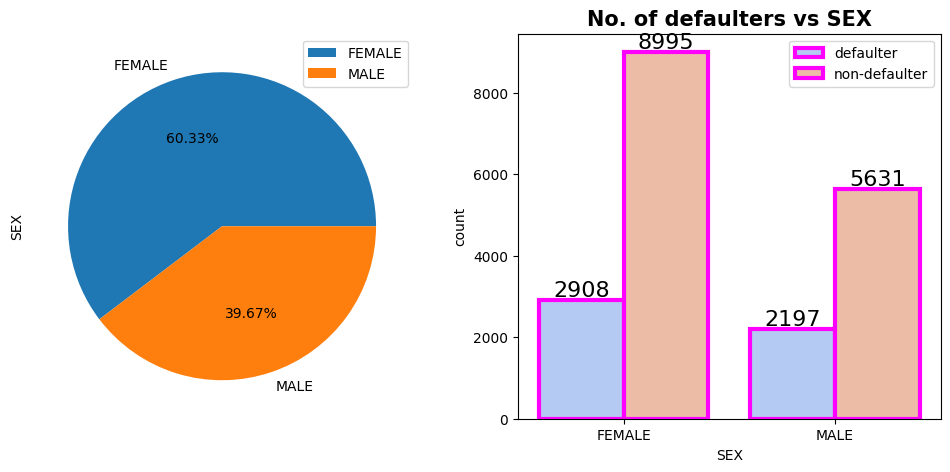

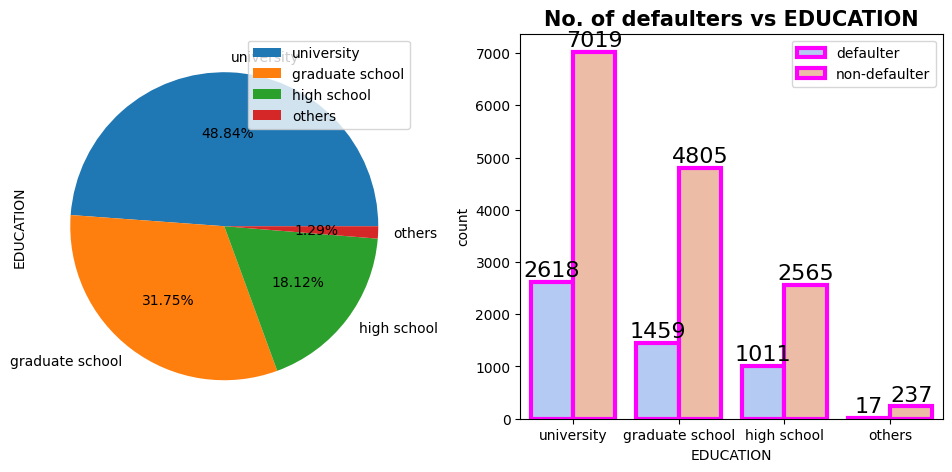

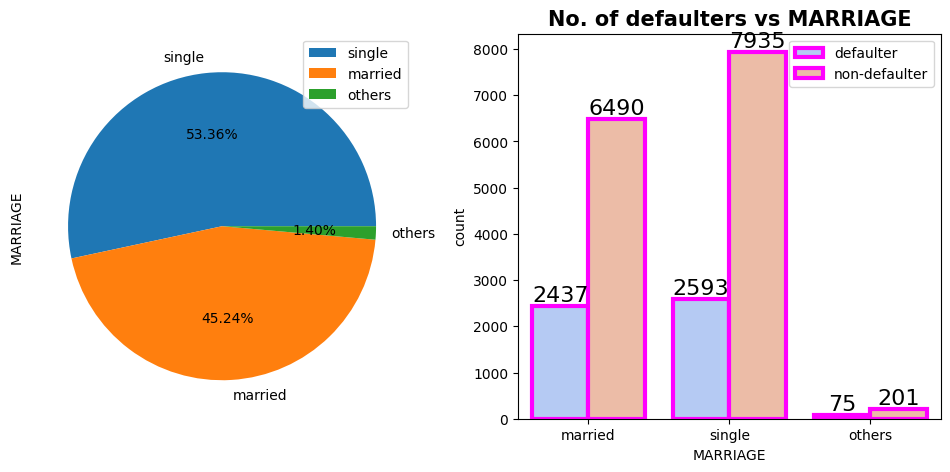

In [153]:

# Now Plotting the value counts of these categorical variables.
# Also visualizing the relationship of these variables with our dependent variable using subplots on the above categorical dataframe.

for col in cat_var_df.columns[:-1]:
  fig, axes = plt.subplots(ncols=2,figsize=(12,5))

  # Plotting the value counts of categorical variables using pie chart.
  cat_var_df[col].value_counts().plot(kind="pie",autopct='%1.2f%%',ax = axes[0],subplots=True, legend=True)

  # Plotting the relationship between above categorical features and our dependent variables using count plot.
  ax = sns.countplot(x=col, data=cat_var_df,  palette = 'coolwarm', hue="is_defaulter" ,edgecolor = 'magenta',lw =3)

  # Setting the legend at the best location and setting the title.
  plt.legend(loc='upper right')
  plt.title(f'No. of defaulters vs {col}',weight ='bold', fontsize= 15)

# Annotating the counts in countplot charts.
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, '{:1.0f}'.format(height),ha = "center", fontsize= 16)


From above graphs we can see draw following insights:


There are more females credit card holders, and therefore there are more female defaulters.

We can clearly see that single people opt for credit cards more than married people.

We can clearly see that higher educated people tend to opt for credit cards more than other people.

<Axes: xlabel='age_group', ylabel='count'>

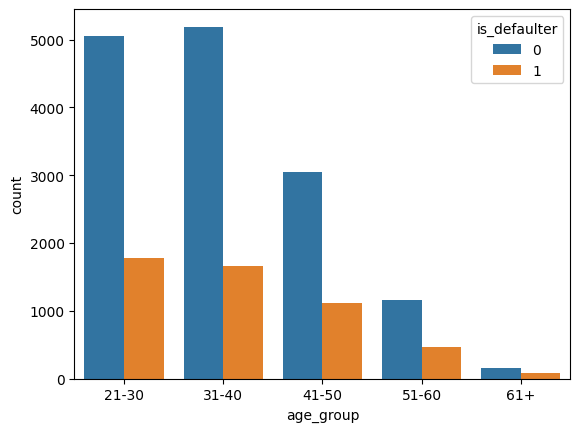

In [154]:
bin_edges = [20, 30, 40, 50, 60, 100]

# Create labels for the age groups
bin_labels = [ '21-30', '31-40', '41-50', '51-60', '61+']

# Create a new column with age bins
df['age_group'] = pd.cut(df['AGE'], bins=bin_edges, labels=bin_labels, right=False)

# Print the DataFrame with the new age group column
sns.countplot(x='age_group',hue ="is_defaulter",data=df)

<Axes: xlabel='is_defaulter', ylabel='LIMIT_BAL'>

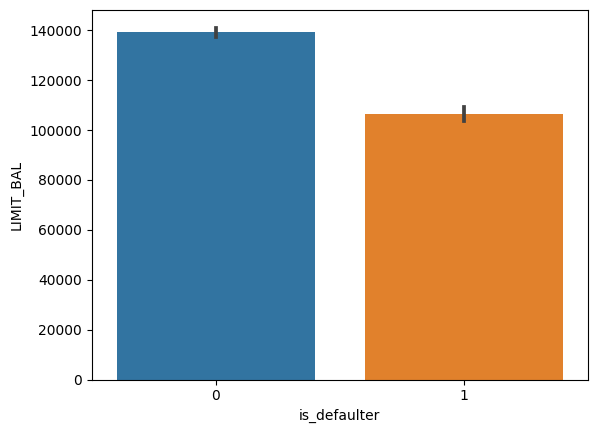

In [155]:
sns.barplot(x='is_defaulter', y='LIMIT_BAL', data=df)

we observe that more the amount limit means more no of chanse of defaulter

### Payment Status History

In [156]:
# Looking at the repayment columns for each month.
repayment_feature_list = ['REPAY_STATUS_SEPT',	'REPAY_STATUS_AUG',	'REPAY_STATUS_JUL',	'REPAY_STATUS_JUN',	'REPAY_STATUS_MAY',	'REPAY_STATUS_APR']

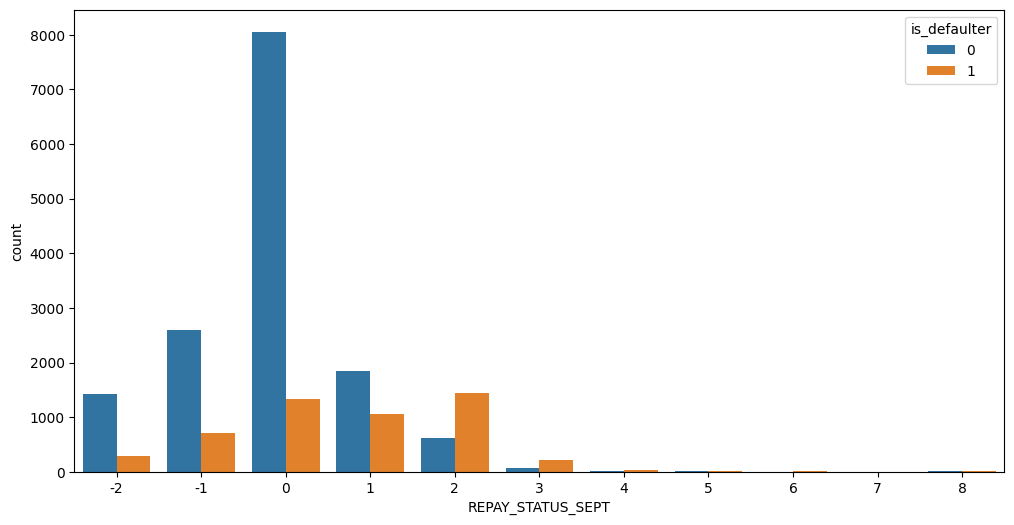

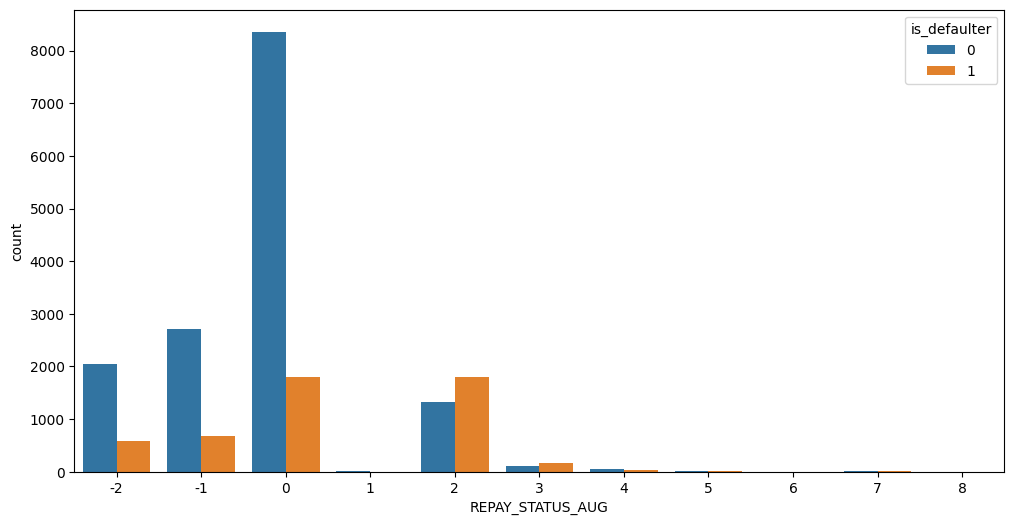

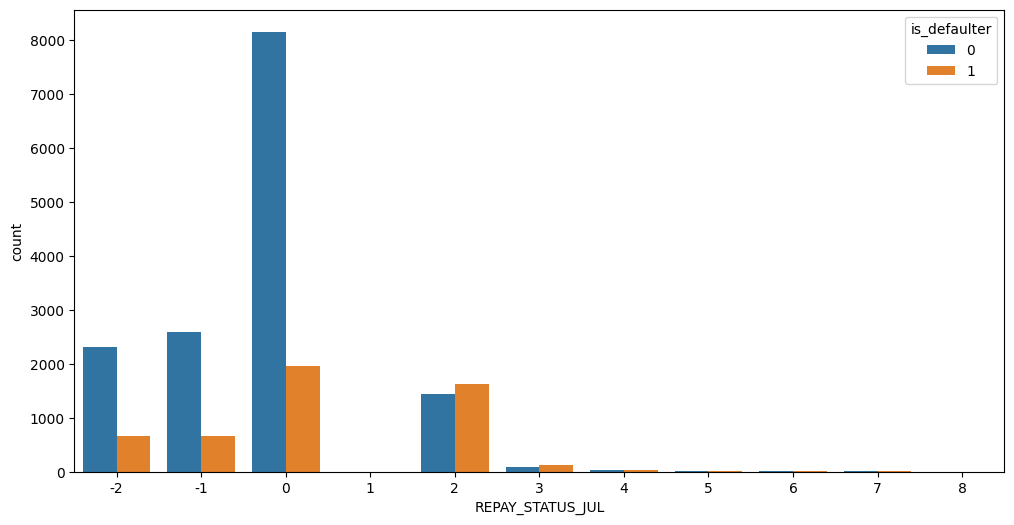

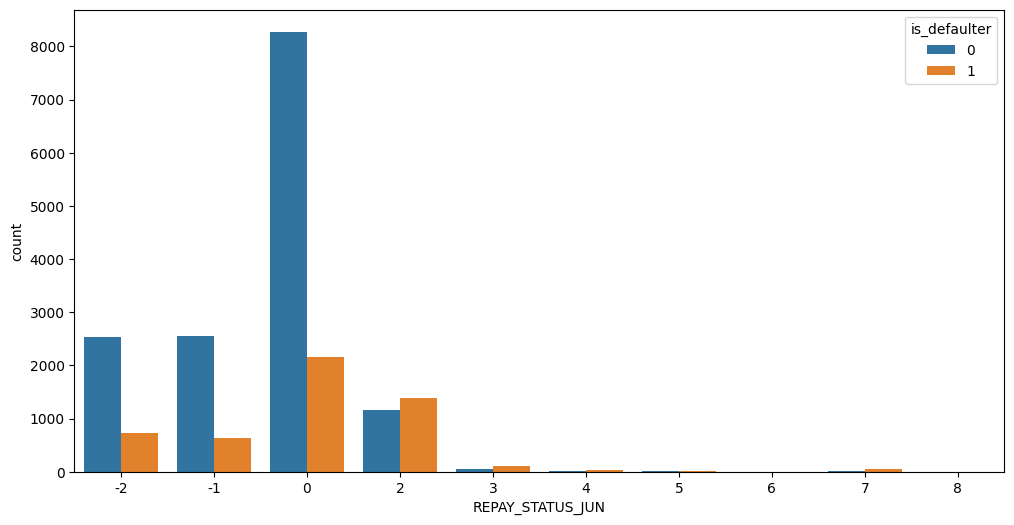

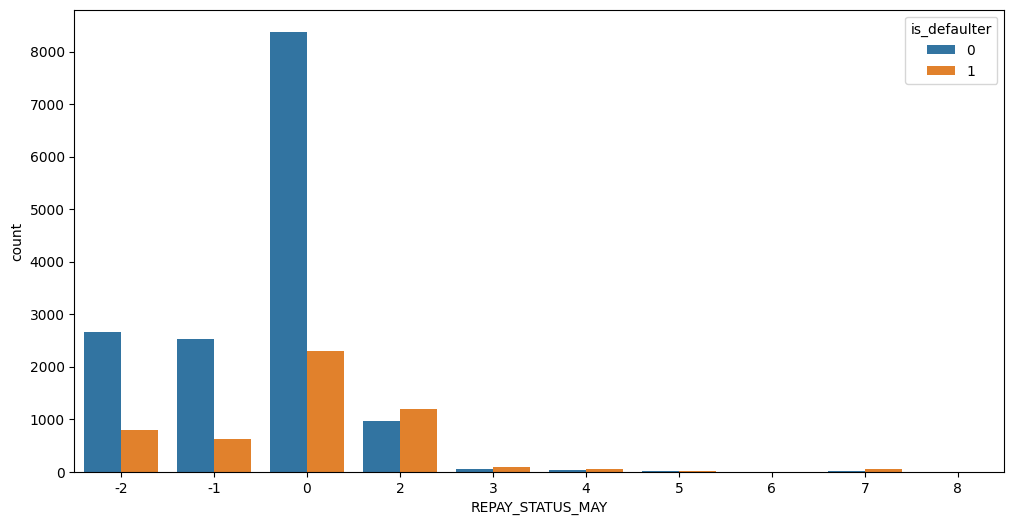

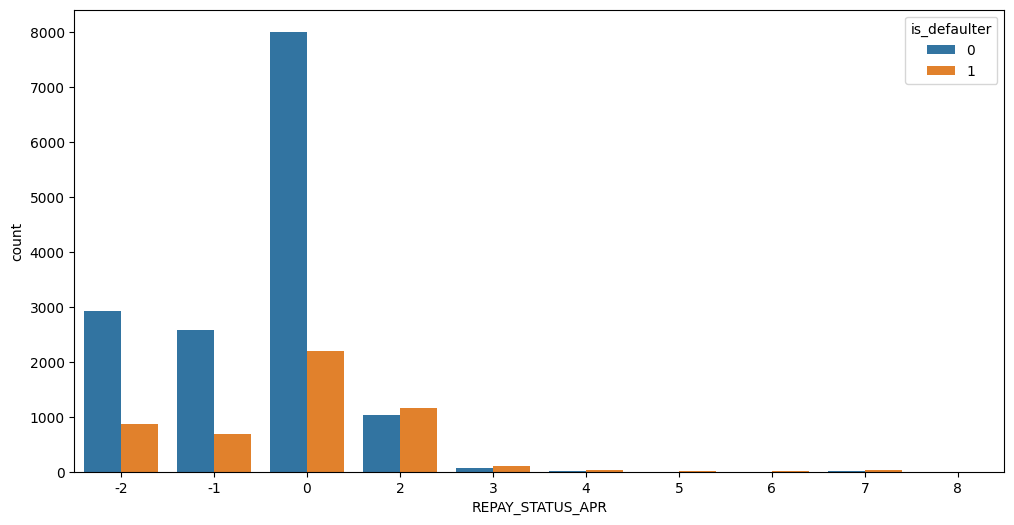

In [157]:

# Plotting graph for each payment feature.
for pay_column in repayment_feature_list:
  plt.figure(figsize=(12,6))
  sns.countplot(x = pay_column, hue = 'is_defaulter', data = df)

In [158]:
# # prepare for pair plot
df_bill_amount = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]
pay_amount = df[['PRE_PAY_AMT_SEPT', 'PRE_PAY_AMT_AUG','PRE_PAY_AMT_JUL', 'PRE_PAY_AMT_JUN', 'PRE_PAY_AMT_MAY','PRE_PAY_AMT_APR']]

<Figure size 300x300 with 0 Axes>

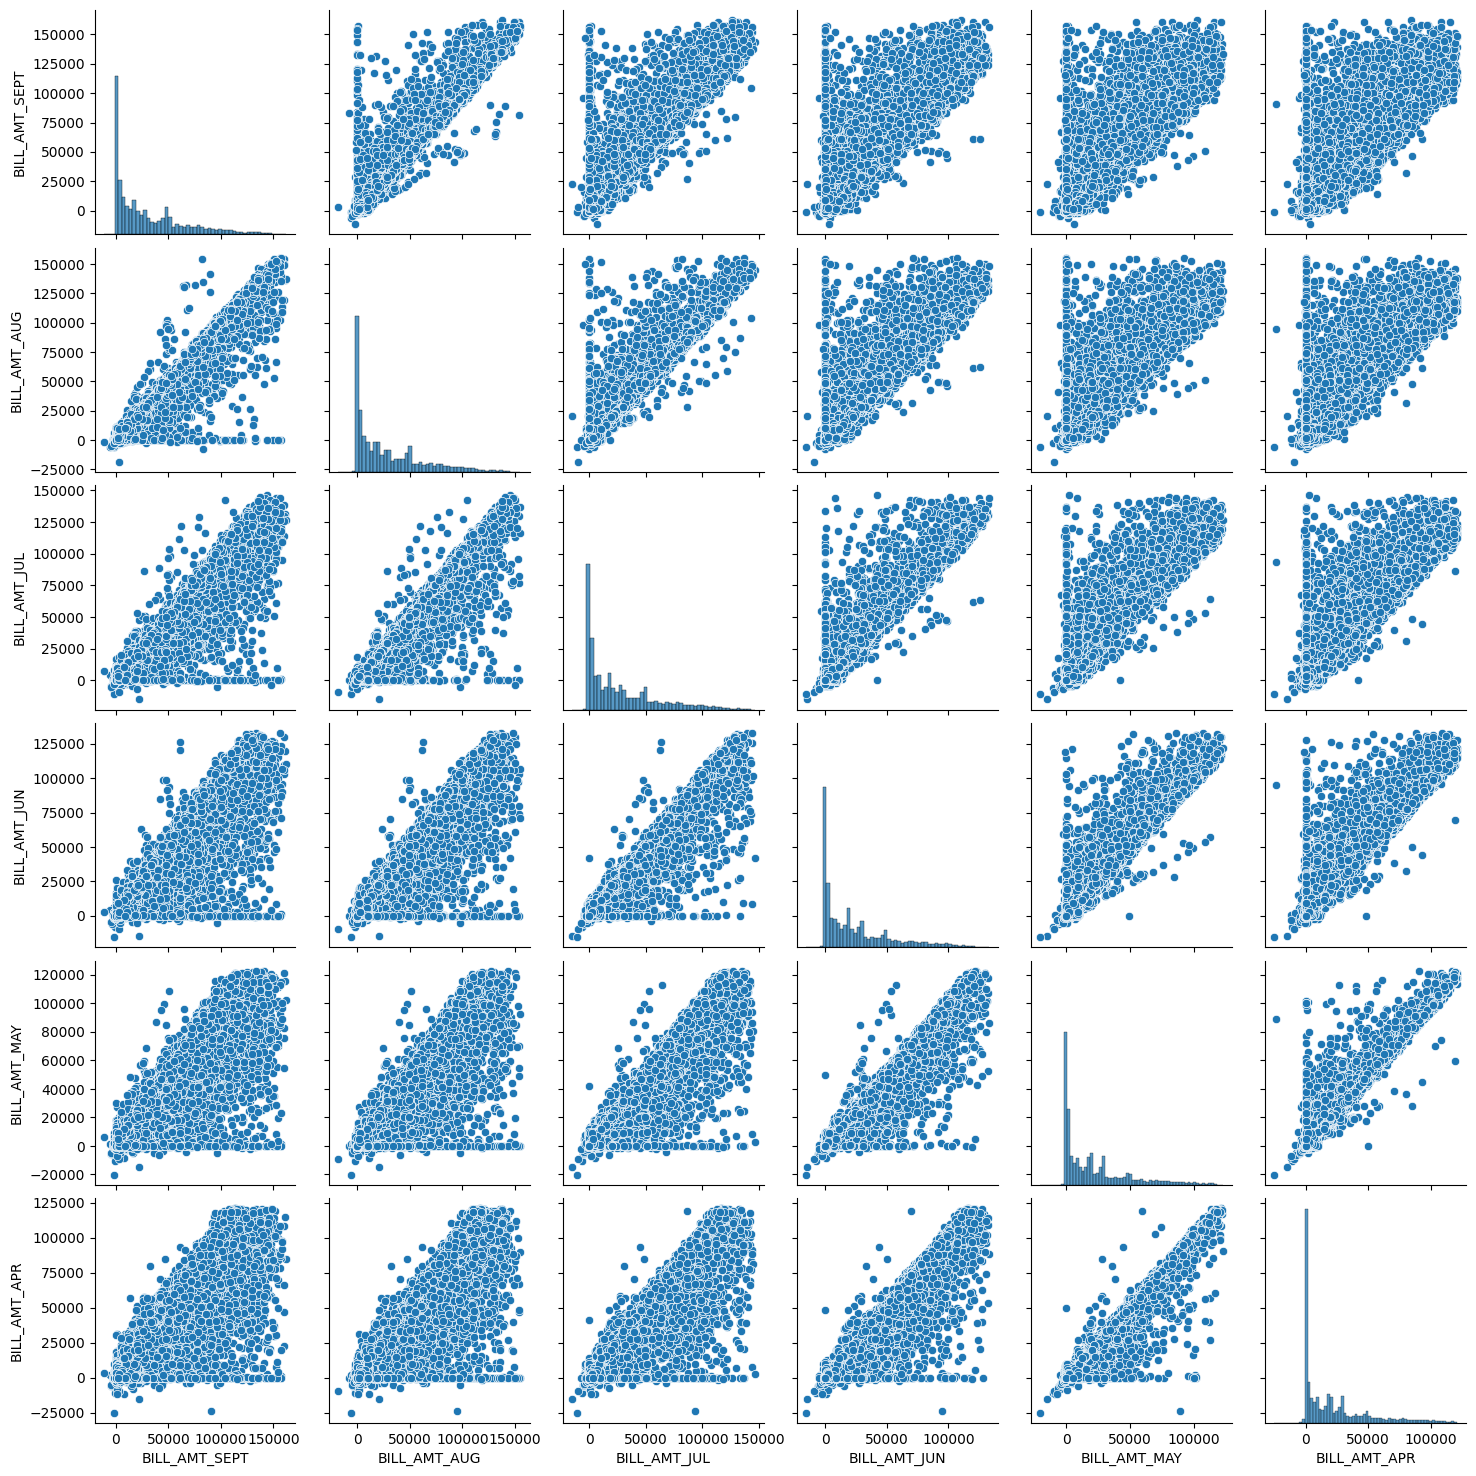

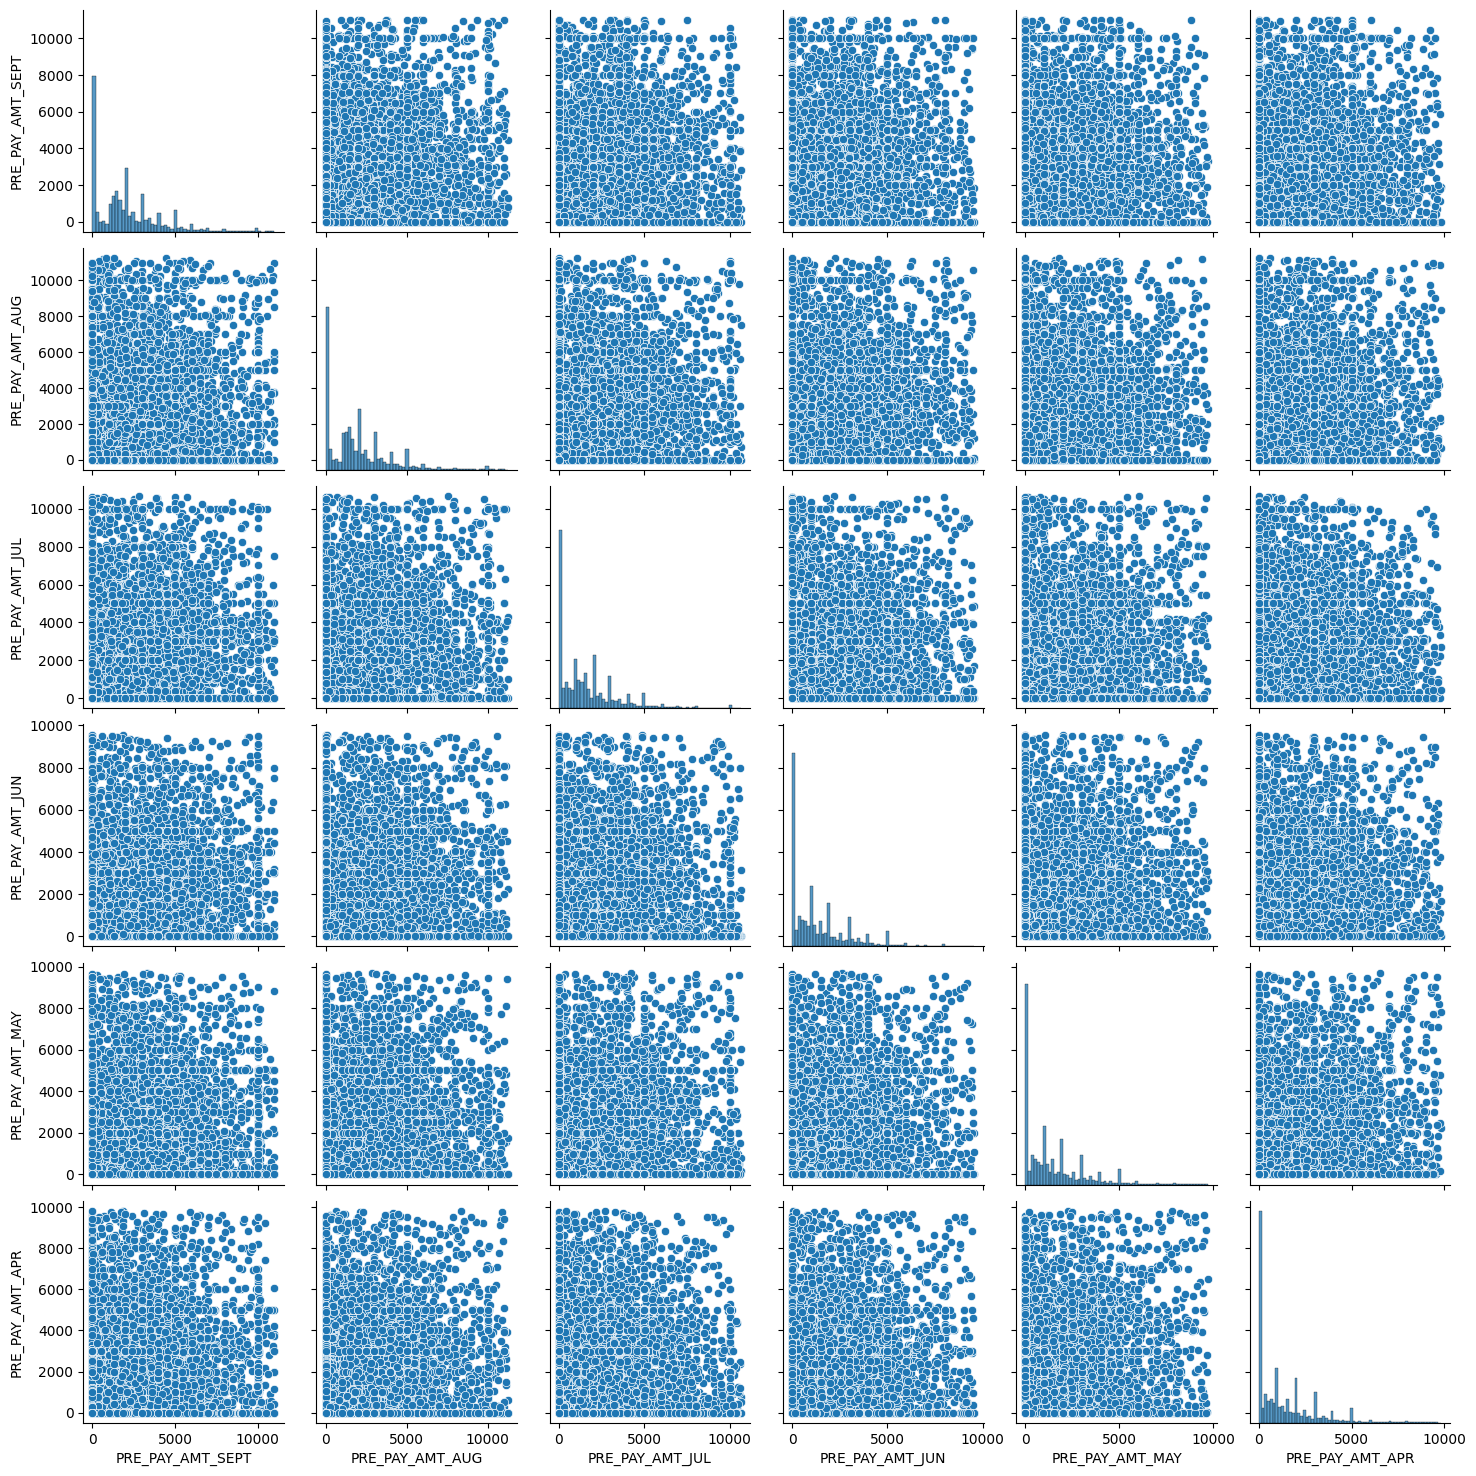

In [159]:
#pair plot
plt.figure(figsize=(3, 3))
sns.pairplot(df_bill_amount)
sns.pairplot(pay_amount)

In [160]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'REPAY_STATUS_SEPT', 'REPAY_STATUS_AUG', 'REPAY_STATUS_JUL',
       'REPAY_STATUS_JUN', 'REPAY_STATUS_MAY', 'REPAY_STATUS_APR',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PRE_PAY_AMT_SEPT', 'PRE_PAY_AMT_AUG',
       'PRE_PAY_AMT_JUL', 'PRE_PAY_AMT_JUN', 'PRE_PAY_AMT_MAY',
       'PRE_PAY_AMT_APR', 'is_defaulter', 'age_group'],
      dtype='object')

In [161]:
numeric_features=['LIMIT_BAL','AGE','BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PRE_PAY_AMT_SEPT', 'PRE_PAY_AMT_AUG', 'PRE_PAY_AMT_JUL',
       'PRE_PAY_AMT_JUN', 'PRE_PAY_AMT_MAY', 'PRE_PAY_AMT_APR']

# Skewness Distribution 

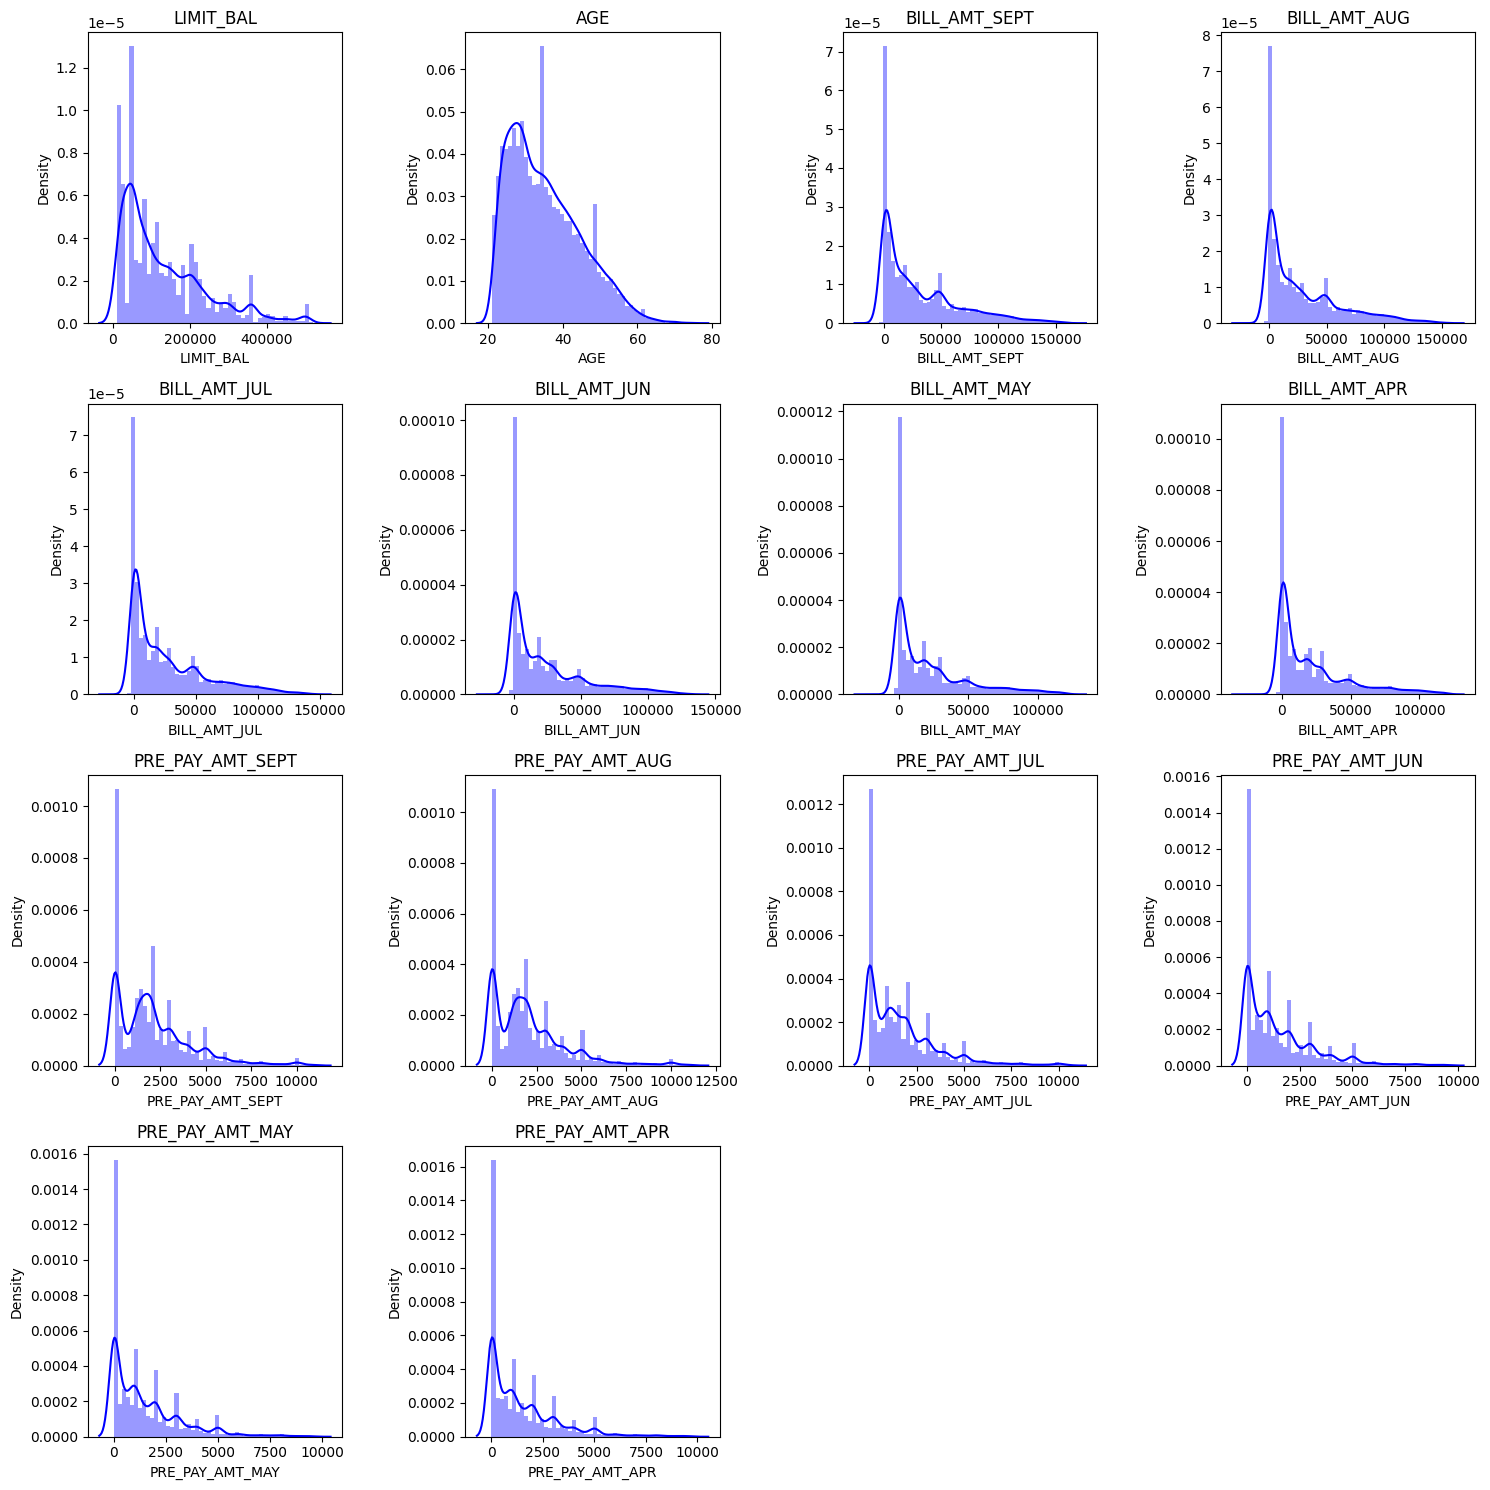

In [162]:
n = 1
plt.figure(figsize=(15,15))

for i in numeric_features:
  plt.subplot(4,4,n)
  n=n+1
  sns.distplot(df[i],color='blue')
  plt.title(i)
  plt.tight_layout()

<Axes: >

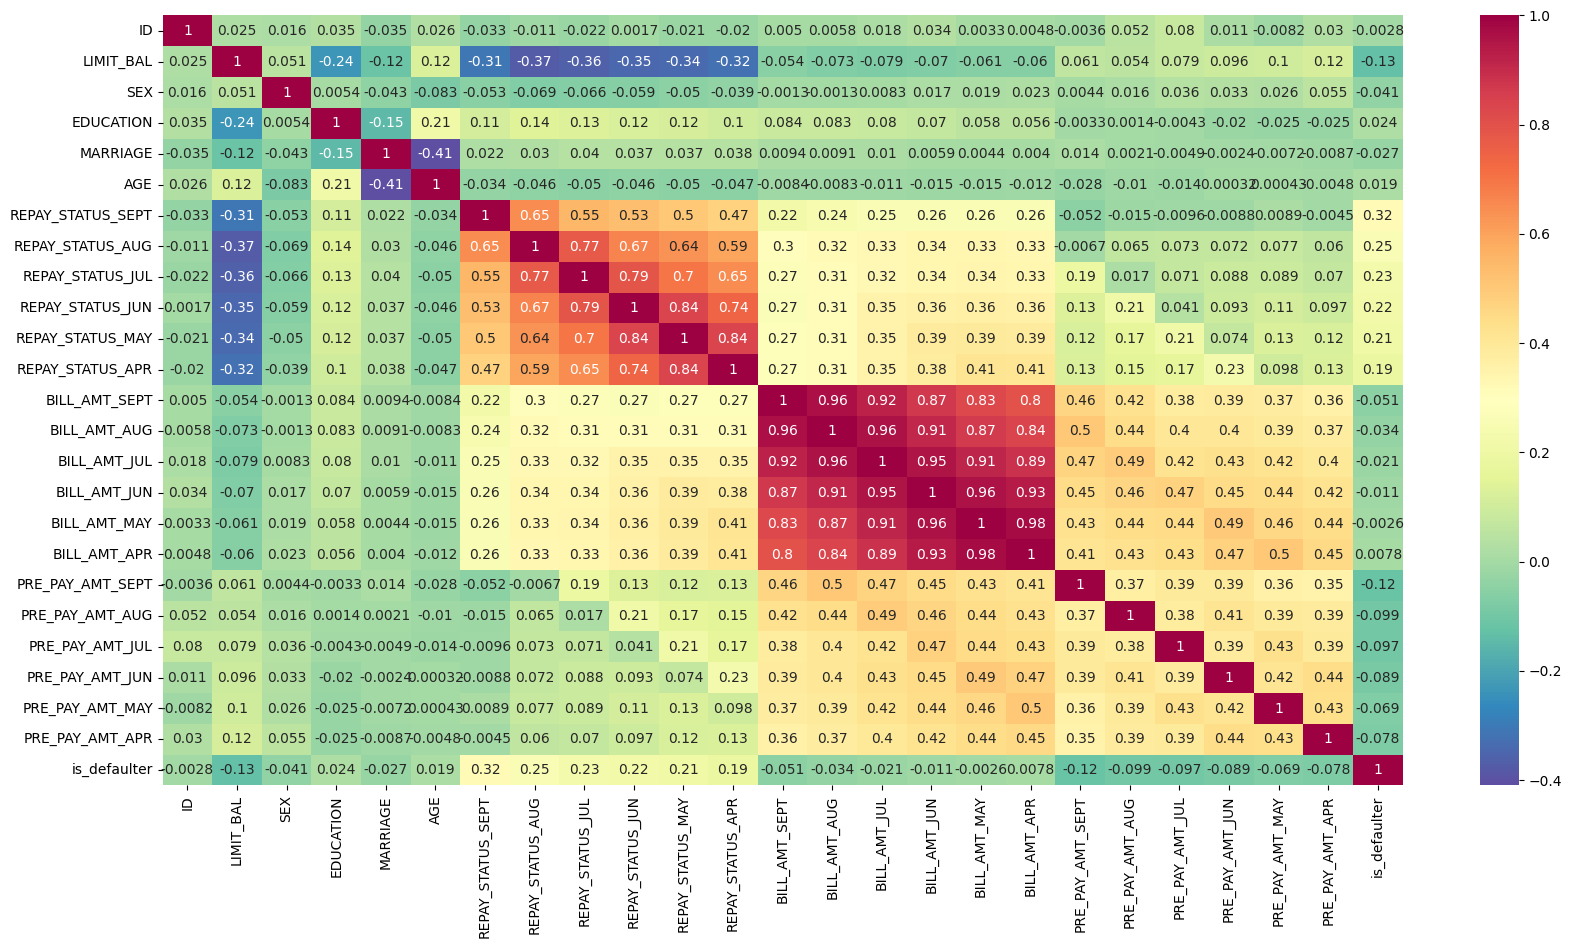

In [163]:
# Checking the correlation between our numerical features.
plt.figure(figsize= (20,10))
correlation= df.corr()
sns.heatmap(correlation, annot=True, cmap='Spectral_r')

 CRAMER'S V

In [164]:
# Using association_metrics library
import association_metrics as am

# Convert object columns to Category columns
crv = cat_var_df.apply(lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CramersV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(crv)
# It will return a pairwise matrix filled with Cramer's V, where
# columns and index are the categorical variables of the passed pandas.DataFrame
cfit = cramers_v.fit().round(2)
cfit

SEX  EDUCATION  MARRIAGE  is_defaulter
SEX           1.00       0.02      0.05          0.04
EDUCATION     0.02       1.00      0.15          0.07
MARRIAGE      0.05       0.15      1.00          0.03
is_defaulter  0.04       0.07      0.03          1.00

# Detecting outliers in our dataframe

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(1, 0, 'ID'),
  Text(2, 0, 'LIMIT_BAL'),
  Text(3, 0, 'SEX'),
  Text(4, 0, 'EDUCATION'),
  Text(5, 0, 'MARRIAGE'),
  Text(6, 0, 'AGE'),
  Text(7, 0, 'REPAY_STATUS_SEPT'),
  Text(8, 0, 'REPAY_STATUS_AUG'),
  Text(9, 0, 'REPAY_STATUS_JUL'),
  Text(10, 0, 'REPAY_STATUS_JUN'),
  Text(11, 0, 'REPAY_STATUS_MAY'),
  Text(12, 0, 'REPAY_STATUS_APR'),
  Text(13, 0, 'BILL_AMT_SEPT'),
  Text(14, 0, 'BILL_AMT_AUG'),
  Text(15, 0, 'BILL_AMT_JUL'),
  Text(16, 0, 'BILL_AMT_JUN'),
  Text(17, 0, 'BILL_AMT_MAY'),
  Text(18, 0, 'BILL_AMT_APR'),
  Text(19, 0, 'PRE_PAY_AMT_SEPT'),
  Text(20, 0, 'PRE_PAY_AMT_AUG'),
  Text(21, 0, 'PRE_PAY_AMT_JUL'),
  Text(22, 0, 'PRE_PAY_AMT_JUN'),
  Text(23, 0, 'PRE_PAY_AMT_MAY'),
  Text(24, 0, 'PRE_PAY_AMT_APR'),
  Text(25, 0, 'is_defaulter')])

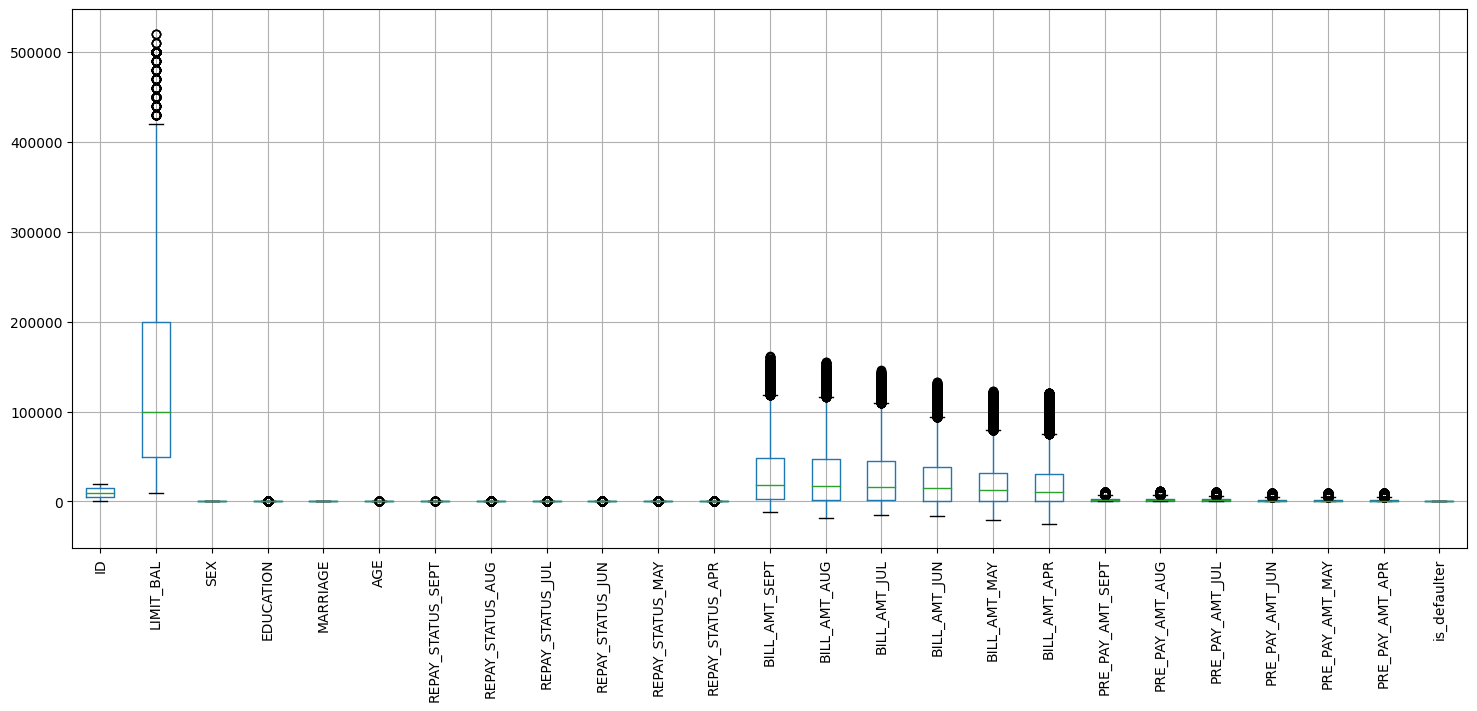

In [165]:
# Draw box plot to see if there is any outliers in our dataset
plt.figure (figsize= (18,7))
df.boxplot()
plt.xticks(rotation=90)


# Feature Engineering

In [166]:
# Now checking for correlation among our dependent variables (Multicollinearity) using VIF analysis.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [167]:
# performing VIF analysis
calc_vif(df[[i for i in df.describe().columns if i not in ['is_defaulter']]])

variables        VIF
0                  ID   3.976952
1           LIMIT_BAL   3.221509
2                 SEX   9.361624
3           EDUCATION   8.093205
4            MARRIAGE   6.560674
5                 AGE  11.391672
6   REPAY_STATUS_SEPT   1.862568
7    REPAY_STATUS_AUG   3.508393
8    REPAY_STATUS_JUL   4.638065
9    REPAY_STATUS_JUN   5.627914
10   REPAY_STATUS_MAY   6.384333
11   REPAY_STATUS_APR   4.304012
12      BILL_AMT_SEPT  25.507341
13       BILL_AMT_AUG  48.022934
14       BILL_AMT_JUL  41.973848
15       BILL_AMT_JUN  42.822335
16       BILL_AMT_MAY  61.449861
17       BILL_AMT_APR  38.312936
18   PRE_PAY_AMT_SEPT   3.798702
19    PRE_PAY_AMT_AUG   3.640030
20    PRE_PAY_AMT_JUL   3.318322
21    PRE_PAY_AMT_JUN   3.320283
22    PRE_PAY_AMT_MAY   2.995410
23    PRE_PAY_AMT_APR   2.616473

As we can see from above, that some of our features have high multicollinearity in them particularly the bill amount columns. so we need to do some feature engineering on them.

In [168]:
# Lets add up all bill amount features together in one.
df['TOTAL_BILL_PAY'] = df['BILL_AMT_SEPT'] + df['BILL_AMT_AUG'] + df['BILL_AMT_JUL'] + df['BILL_AMT_JUN'] +  df['BILL_AMT_MAY'] + df['BILL_AMT_APR']
# Lets check again.
calc_vif(df[[i for i in df.describe().columns if i not in ['is_defaulter','BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]])

variables        VIF
0                  ID   3.932612
1           LIMIT_BAL   3.203829
2                 SEX   9.347583
3           EDUCATION   8.072216
4            MARRIAGE   6.549873
5                 AGE  11.378192
6   REPAY_STATUS_SEPT   1.861326
7    REPAY_STATUS_AUG   3.434694
8    REPAY_STATUS_JUL   4.590201
9    REPAY_STATUS_JUN   5.611486
10   REPAY_STATUS_MAY   6.343061
11   REPAY_STATUS_APR   4.222110
12   PRE_PAY_AMT_SEPT   3.515503
13    PRE_PAY_AMT_AUG   3.443561
14    PRE_PAY_AMT_JUL   3.155244
15    PRE_PAY_AMT_JUN   3.138130
16    PRE_PAY_AMT_MAY   2.713865
17    PRE_PAY_AMT_APR   2.567572
18     TOTAL_BILL_PAY   3.712295

## One Hot encoding

In [169]:
# Label encoding. encoding sex variable. assigning 2 to 0 (which means female) and 1 to male
df.replace({'SEX' : {1:1,2:0}}, inplace=True)

# One hot encoding.
df = pd.get_dummies(df,columns=['EDUCATION','MARRIAGE'],drop_first=True)

In [170]:
df.head()

ID  LIMIT_BAL  SEX  AGE  REPAY_STATUS_SEPT  REPAY_STATUS_AUG  \
0   1      20000    0   24                  2                 2   
1   2     120000    0   26                 -1                 2   
2   3      90000    0   34                  0                 0   
3   4      50000    0   37                  0                 0   
4   5      50000    1   37                  0                 0   

   REPAY_STATUS_JUL  REPAY_STATUS_JUN  REPAY_STATUS_MAY  REPAY_STATUS_APR  \
0                -1                -1                -2                -2   
1                 0                 0                 0                 2   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  BILL_AMT_JUN  BILL_AMT_MAY  \
0           3913          3102           689             0             0   
1           2682          1725          2682          3272          3455   
2          29239         14027         13559         14331         14948   
3          46990         48233         49291         28314         28959   
4          64400         57069         57608         19394         19619   

   BILL_AMT_APR  PRE_PAY_AMT_SEPT  PRE_PAY_AMT_AUG  PRE_PAY_AMT_JUL  \
0             0                 0              689                0   
1          3261                 0             1000             1000   
2         15549              1518             1500             1000   
3         29547              2000             2019             1200   
4         20024              2500             1815              657   

   PRE_PAY_AMT_JUN  PRE_PAY_AMT_MAY  PRE_PAY_AMT_APR  is_defaulter age_group  \
0                0                0                0             1     21-30   
1             1000                0             2000             1     21-30   
2             1000             1000             5000             0     31-40   
3             1100             1069             1000             0     31-40   
4             1000             1000              800             0     31-40   

   TOTAL_BILL_PAY  EDUCATION_2  EDUCATION_3  EDUCATION_4  MARRIAGE_2  \
0            7704            1            0            0           0   
1           17077            1            0            0           1   
2          101653            1            0            0           1   
3          231334            1            0            0           0   
4          238114            0            0            0           1   

   MARRIAGE_3  
0           0  
1           0  
2           0  
3           0  
4           0

In [171]:
# Creating dependent variable and independent variable
independent_variables = df.drop(['is_defaulter','is_defaulter','ID','BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR',"age_group"],axis=1)
dependent_variable = df['is_defaulter']



### Normalization

In [172]:
# scaling the data using zscore.
from scipy.stats import zscore
x = round(independent_variables.apply(zscore),3)
y = dependent_variable

In [173]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Now we need to take mandatory action towrds the class Imbalance

# APPLYING SMOTE (Synthetic Minority Oversampling Technique)


Since we have an imbalanced dataset, we are going to need to apply some technique to remedy this. So we will try oversampling technique called SMOTE.

In [174]:
# applying oversampling to overcome class imbalance
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_train_smote,y_train_smote = smote.fit_resample(x,y)

from collections import Counter
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smote))
Counter(y_train_smote)

Original dataset shape Counter({0: 11694, 1: 4090})
Resample dataset shape Counter({1: 14626, 0: 14626})


Counter({1: 14626, 0: 14626})

In [175]:
#column after smote
columns = list(df.columns)

In [176]:
#dataframe of balance datset
balance_df = pd.DataFrame(x_train_smote, columns=columns)

In [177]:
#target variable
balance_df['IsDefaulter'] = y_train_smote

<Axes: xlabel='IsDefaulter', ylabel='count'>

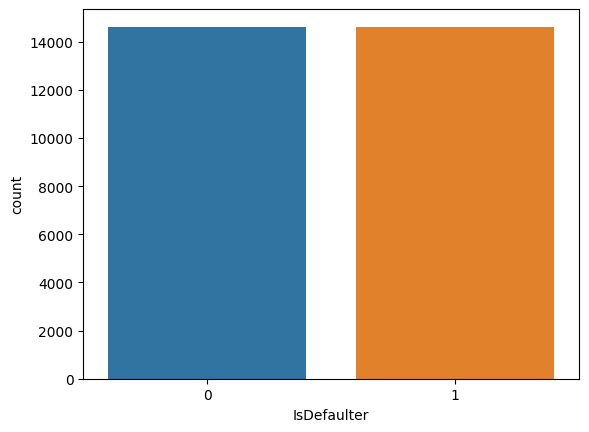

In [178]:
#plot for target variable after the smote
sns.countplot(x='IsDefaulter', data = balance_df)

# MODEL IMPLEMENTATION

#1.Logistic Regression



In [179]:
# initiate the model.
logistic_model= LogisticRegression()

# define the parameter grid.
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

# implementing the model.
logistic_model= GridSearchCV(logistic_model, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 5)
logistic_model.fit(x_train_smote, y_train_smote)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [180]:
# getting the best estimator
logistic_model.best_estimator_

LogisticRegression(C=0.001)

In [181]:
# getting the optimal parameters
logistic_model.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [182]:
#score of logistic regression after grid search
logistic_model.best_score_

0.6741432233806186

In [183]:
# getting the predicted class
y_train_class_preds_logistic = logistic_model.predict(x_train_smote)
y_test_class_preds_logistic = logistic_model.predict(x_test)

In [184]:
# getting the predicted probability of target variable.
y_train_preds_logistic = logistic_model.predict_proba(x_train_smote)[:,1]
y_test_preds_logistic = logistic_model.predict_proba(x_test)[:,1]

In [185]:
# checking the accuracy on training and unseen test data.
logistic_train_accuracy= accuracy_score(y_train_smote, y_train_class_preds_logistic)
logistic_test_accuracy= accuracy_score(y_test, y_test_class_preds_logistic)

print("The accuracy on train data is ", logistic_train_accuracy)
print("The accuracy on test data is ", logistic_test_accuracy)

The accuracy on train data is  0.679064679338165
The accuracy on test data is  0.6769698505193819


In [186]:
# writing a function for evaluating various metrics
def evaluation_metrics(actual, predicted):

  metrics_list = []
  accuracy = accuracy_score(actual,predicted)
  precision = precision_score(actual, predicted)
  recall = recall_score(actual, predicted)
  model_f1_score = f1_score(actual, predicted)


  metrics_list = [accuracy,precision,recall,model_f1_score]
  return metrics_list

In [187]:
# Let's store these metrics in a dataframe. that way we can easily compare metrics of different models.
# first store this data in a dict.
metric_name_list = ['accuracy','precision','recall','f1_score','confusion_matrix']
metric_values = evaluation_metrics(y_test, y_test_class_preds_logistic)

# zipping together above lists to form a dictionary
metric_dict = dict(zip(metric_name_list,metric_values))

# creating a dataframe out of this.
evaluation_metric_df = pd.DataFrame.from_dict(metric_dict, orient='index').reset_index()
evaluation_metric_df.columns = ['Evaluation Metric','Logistic Regression']

In [188]:
evaluation_metric_df

Evaluation Metric  Logistic Regression
0          accuracy             0.676970
1         precision             0.417408
2            recall             0.647291
3          f1_score             0.507532

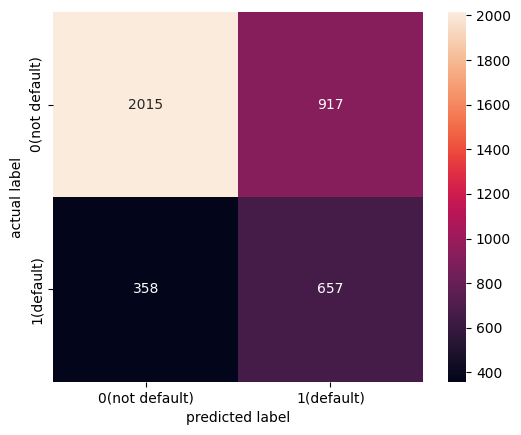

In [189]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test,y_test_class_preds_logistic)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(not default)', '1(default)'],
                        yticklabels=['0(not default)', '1(default)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

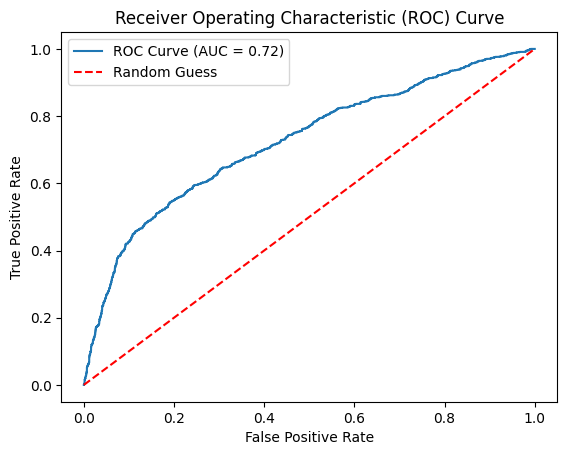

In [190]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities for the positive class
y_prob = logistic_model.predict_proba(x_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [191]:
# pip install optuna

In [192]:
import optuna




def objective(trial):
    # Define the hyperparameters to optimize
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 0.001, 100.0)

    # Create a logistic regression model with the suggested hyperparameters
    model = LogisticRegression(penalty=penalty, C=C, solver='liblinear', random_state=30)


    # Fit the model on the training data
    model.fit(x_train_smote, y_train_smote)

    # Predict the target values for the test data
    y_pred = model.predict(x_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create the Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and their corresponding accuracy
best_trial = study.best_trial
print('Best Hyperparameters: {}'.format(best_trial.params))
print('Best Accuracy: {}'.format(best_trial.value))

[I 2023-06-21 00:05:32,970] A new study created in memory with name: no-name-3a7d4b76-0acd-41a8-baa8-679555128e76
[I 2023-06-21 00:05:33,156] Trial 0 finished with value: 0.6777299214593362 and parameters: {'penalty': 'l1', 'C': 1.1794134561442056}. Best is trial 0 with value: 0.6777299214593362.
[I 2023-06-21 00:05:33,319] Trial 1 finished with value: 0.6736762097795794 and parameters: {'penalty': 'l2', 'C': 0.005819498975999833}. Best is trial 0 with value: 0.6777299214593362.
[I 2023-06-21 00:05:33,453] Trial 2 finished with value: 0.6774765644793515 and parameters: {'penalty': 'l2', 'C': 2.380134993792492}. Best is trial 0 with value: 0.6777299214593362.
[I 2023-06-21 00:05:33,588] Trial 3 finished with value: 0.6731694958196098 and parameters: {'penalty': 'l2', 'C': 0.0023213778661154236}. Best is trial 0 with value: 0.6777299214593362.
[I 2023-06-21 00:05:33,754] Trial 4 finished with value: 0.6777299214593362 and parameters: {'penalty': 'l1', 'C': 3.2890342147057936}. Best is tr

Best Hyperparameters: {'penalty': 'l1', 'C': 2.425969263209161}
Best Accuracy: 0.677983278439321


### Feature Selection

In [193]:
# from sklearn.feature_selection import RFE



# # Specify the number of desired features to select
# num_features = 15

# # Create an RFE object with the logistic regression model and number of features to select
# rfe = RFE(estimator=logistic_model, n_features_to_select=num_features)

# # Fit the RFE object to the data
# rfe.fit(x_train_smote, y_train_smote)

# # Get the selected features
# selected_features = x_train_smote.columns[rfe.support_]

# # Print the selected features
# print("Selected Features:")
# print(selected_features)


In [194]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_smote[['LIMIT_BAL', 'SEX', 'REPAY_STATUS_SEPT', 'REPAY_STATUS_AUG',
       'REPAY_STATUS_JUN', 'PRE_PAY_AMT_SEPT', 'PRE_PAY_AMT_AUG',
       'PRE_PAY_AMT_JUN', 'PRE_PAY_AMT_MAY', 'TOTAL_BILL_PAY', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3']], y_train_smote)
y_test_pred_log = logistic_model.predict(x_test[['LIMIT_BAL', 'SEX', 'REPAY_STATUS_SEPT', 'REPAY_STATUS_AUG',
       'REPAY_STATUS_JUN', 'PRE_PAY_AMT_SEPT', 'PRE_PAY_AMT_AUG',
       'PRE_PAY_AMT_JUN', 'PRE_PAY_AMT_MAY', 'TOTAL_BILL_PAY', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3']])
logistic_test_accuracy= accuracy_score(y_test, y_test_pred_log)
logistic_test_accuracy

0.6797567772992146

# 2. Random Forest Classifier

In [195]:
# Importing Random forest
from sklearn.ensemble import RandomForestClassifier


model_rf= RandomForestClassifier()
grid_values = {'n_estimators':[50,80,90,100], 'max_depth':[9,11,14]}
grid_rf = GridSearchCV(model_rf, param_grid = grid_values, scoring = 'accuracy', cv=3)

# Fitting the model.
grid_rf.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 11, 14],
                         'n_estimators': [50, 80, 90, 100]},
             scoring='accuracy')

In [196]:
# getting the best estimator
grid_rf.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=90)

In [197]:
# getting the best parameter
grid_rf.best_params_

{'max_depth': 14, 'n_estimators': 90}

In [198]:
# Getting the predicted classes
y_train_class_preds_rf = grid_rf.predict(x_train_smote)
y_test_class_preds_rf = grid_rf.predict(x_test)

In [199]:
# Getting the evaluation metrics using our function and adding it to evaluation dataframe to better read it.
evaluation_metric_df['Random Forest']=evaluation_metrics(y_test,y_test_class_preds_rf)
evaluation_metric_df

Evaluation Metric  Logistic Regression  Random Forest
0          accuracy             0.676970       0.877122
1         precision             0.417408       0.776618
2            recall             0.647291       0.733005
3          f1_score             0.507532       0.754181

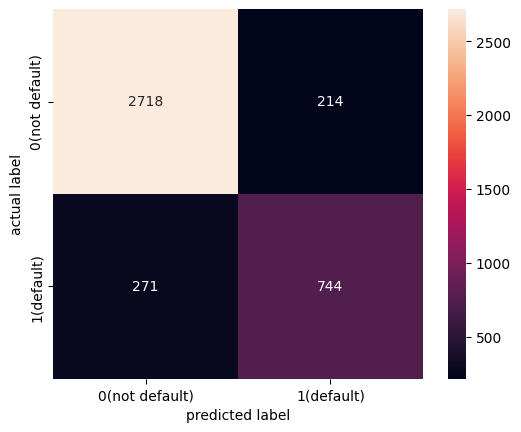

In [200]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test,y_test_class_preds_rf)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(not default)', '1(default)'],
                        yticklabels=['0(not default)', '1(default)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

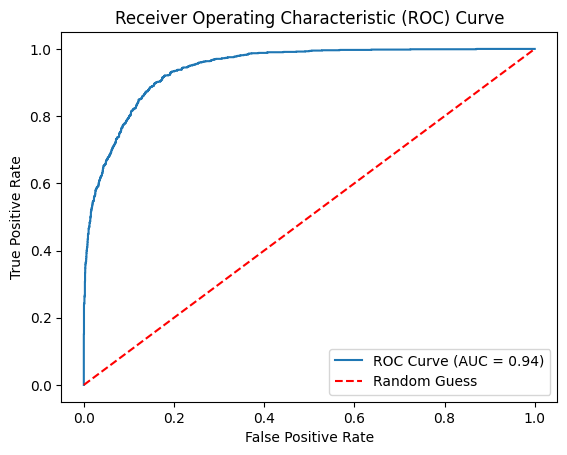

In [201]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities for the positive class
y_prob = grid_rf.predict_proba(x_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Random Forest model has inbuilt support for showing the feature importances - i.e. which feature is more important in coming up with the predicted results. This helps us interpret and understand the model better.

In [202]:
# getting columns names from training data
features = x_train_smote.columns

# getting the feature importances
importances = grid_rf.best_estimator_.feature_importances_
indices = np.argsort(importances)

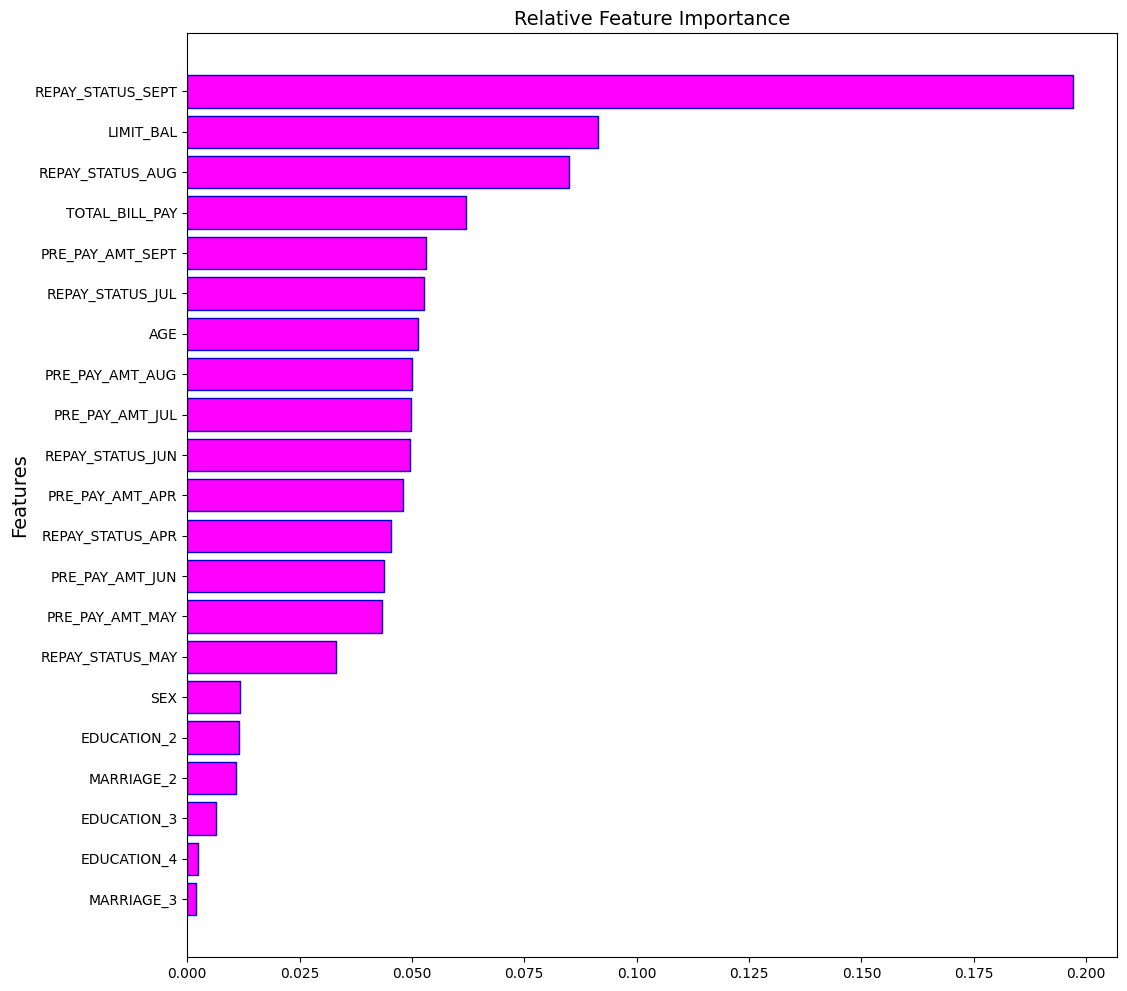

In [203]:
# plotting the feature importances using a horizontal bar graph.
plt.figure (figsize= (12,12))
plt.title('Relative Feature Importance', fontsize=14)
plt.barh(range(len(indices)), importances[indices], color='magenta', edgecolor='mediumblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.ylabel('Features', fontsize=14)
plt.show()

#3. Decision Tree Classifier

In [204]:
from sklearn.tree import DecisionTreeClassifier



# Define the parameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7,9,11,13,15],
    'min_samples_split': [20, 40, 50,60,80]
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform Grid Search with cross-validation
grid_dt = GridSearchCV(dt, param_grid, cv=5)
grid_dt.fit(x_train_smote, y_train_smote)

# Get the best hyperparameters and the best model
best_params = grid_dt.best_params_
best_model = grid_dt.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7947808462123132


In [205]:
# getting the best estimator
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=11, min_samples_split=20)

In [206]:
# getting the best parameter
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 20}

In [207]:
# Getting the predicted classes
y_train_class_preds_dt = grid_dt.predict(x_train_smote)
y_test_class_preds_dt = grid_dt.predict(x_test)

In [208]:
# Getting the evaluation metrics using our function and adding it to evaluation dataframe to better read it.
evaluation_metric_df['Decision Tree']=evaluation_metrics(y_test,y_test_class_preds_dt)
evaluation_metric_df

Evaluation Metric  Logistic Regression  Random Forest  Decision Tree
0          accuracy             0.676970       0.877122       0.794781
1         precision             0.417408       0.776618       0.603431
2            recall             0.647291       0.733005       0.589163
3          f1_score             0.507532       0.754181       0.596211

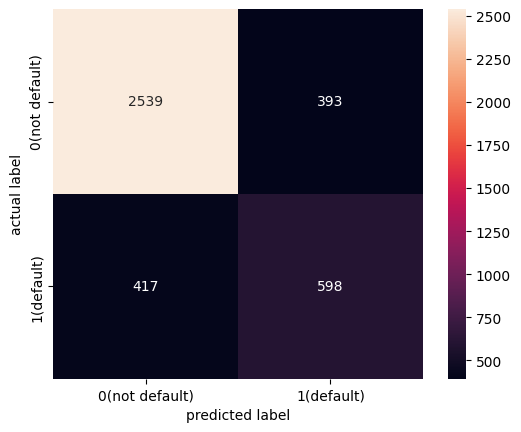

In [209]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test,y_test_class_preds_dt)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(not default)', '1(default)'],
                        yticklabels=['0(not default)', '1(default)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

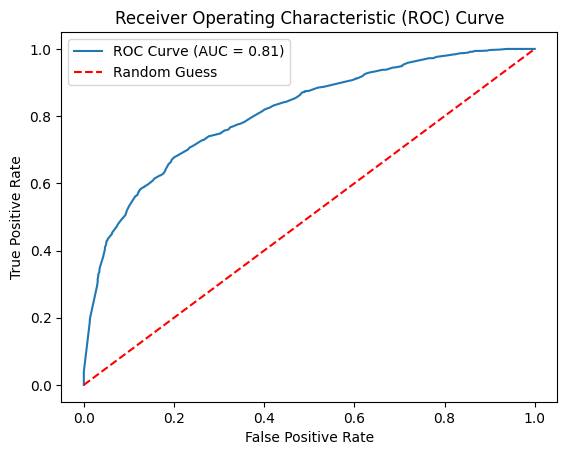

In [210]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities for the positive class
y_prob = grid_dt.predict_proba(x_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


Random Forest model has inbuilt support for showing the feature importances - i.e. which feature is more important in coming up with the predicted results. This helps us interpret and understand the model better.

# 4. K-Nearest Neighbour Classifier

In [211]:
# initializing the model
knn = KNeighborsClassifier()

# knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[4,5,6,7,8,10,12,14]}

# Fitting the model

knn_cv= GridSearchCV(knn,param_grid, scoring = 'accuracy',cv=3)
knn_cv.fit(x_train_smote,y_train_smote)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6, 7, 8, 10, 12, 14]},
             scoring='accuracy')

In [212]:
# find best score
knn_cv.best_score_

0.7782721561759609

In [213]:
# best parameters
knn_cv.best_params_

{'n_neighbors': 4}

In [214]:
knn_cv.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [215]:
# Get the predicted classes
y_train_class_preds_knn = knn_cv.predict(x_train_smote)
y_test_class_preds_knn = knn_cv.predict(x_test)

In [216]:
# getting the evaluation metrics and adding it to metric dataframe.
evaluation_metric_df['KNeighborsClassifier'] = evaluation_metrics(y_test,y_test_class_preds_knn)
evaluation_metric_df

Evaluation Metric  Logistic Regression  Random Forest  Decision Tree  \
0          accuracy             0.676970       0.877122       0.794781   
1         precision             0.417408       0.776618       0.603431   
2            recall             0.647291       0.733005       0.589163   
3          f1_score             0.507532       0.754181       0.596211   

   KNeighborsClassifier  
0              0.857867  
1              0.672492  
2              0.871921  
3              0.759331

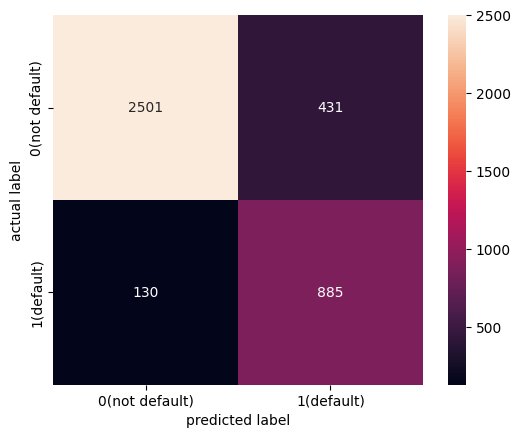

In [217]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test,y_test_class_preds_knn)
sns.heatmap(cnf_matrix, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(not default)', '1(default)'],
                        yticklabels=['0(not default)', '1(default)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

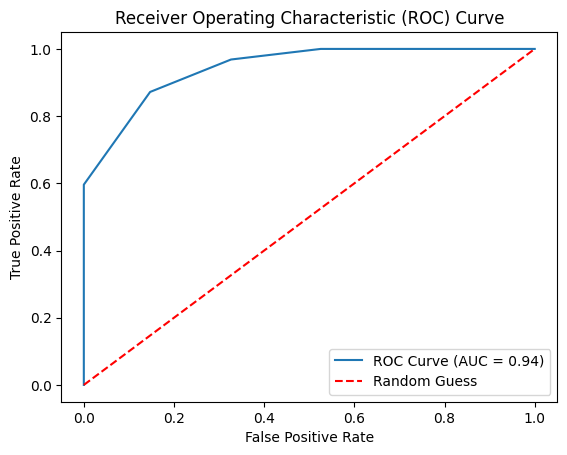

In [218]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities for the positive class
y_prob = knn_cv.predict_proba(x_test)[::,1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Conclusions Drawn:

After conducting  EDA, we found that :


Most of the credit card users are Female and have higher number of defaults.
Most of the credit card users are highly educated.

Single users have more number of credit cards.

The number of credit card users goes down with increase in age as old people have less consumption and may not be able to use credit cards and their purchases are usually made by younger family members.

Using a Logistic Regression classifier, we can predict an approximate accuracy of 68% and ROC_AUC score of 0.72

Using Random Forest Classifier, we can predict an accuracy of around 87% and ROC_AUC score of 0.94

Using K-Neighbor Classifier, we can predict an accuracy of 86% and ROC_AUC score of 0.93

Using Decision Tree Classifier, we can predict an accuracy of 78% and ROC_AUC score of around 0.80

Random Forest Classifier and K Neighbors classifier perform the best among all models.

Our best models are Random Forest and K-Neighbor Classifier as they have the best Precision, Recall, ROC_AUC and F1 score values. This being an imbalanced dataset, Recall will be most important metric as we don't want to classify a defaulter as a non defaulter so that makes K Neighbor Classifier model more suitable for the task